## Data Wrangling

In this notebook we
1. Load [Seattle Airbnb Open Data](https://www.kaggle.com/airbnb/seattle) from Kaggle.
2. Load data for other cities, including Asheville, Austin, Boston, etc, from [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
3. Clean data by removing unwanted columns, drop duplicates(if applicable), going through all the columns to fix data types, fixing missing values, finding outliers and fixing them.

## Import Packages

In [1]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

## Load Data

In [2]:
# Check how many csv files there are
data_dir = '../Data/*.csv'
! ls {data_dir}

../Data/Copenhagen.csv   ../Data/SanFrancisco.csv
../Data/HongKong.csv     ../Data/Seattle.csv


In [3]:
# There are 3 mode for loading data set
# one, two & all
csv_dict = {'one': '../data/Seattle.csv',
            'two': '../data/S*.csv',
            'all': '../data/*.csv'}

load_data_mode = 'one'

In [4]:
# Define function for loading data, there's one argument 'load_data_mode'
# to determine how many cities of data to be loaded.
def load_data(csv_pat):
    filenames = glob(csv_pat)
    dfs = [pd.read_csv(f, low_memory = False) for f in filenames]
    df = pd.concat(dfs)
    return df

In [5]:
# Load data for each city and concat them
df = load_data(csv_dict[load_data_mode])

In [6]:
# Display all columns to check which data we might need visually
pd.set_option('display.max_columns', len(df.columns))
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


## Seleceted Columns that might be useful

In [7]:
# Select features that might be useful
# drop more columns
selected_features = ['picture_url', 'host_since', 'last_scraped',
                     'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                     'host_picture_url', 'host_listings_count', 'host_total_listings_count',
                     'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
                     'neighbourhood', 'neighbourhood_cleansed',
                     'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
                     'country_code', 'latitude', 'longitude',
                     'is_location_exact', 'property_type', 'room_type', 'accommodates',
                     'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
                     'guests_included', 'extra_people', 'minimum_nights', 'calendar_updated',
                     'has_availability',
                     'number_of_reviews', 'first_review', 'last_review',
                     'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication',
                     'review_scores_location', 'review_scores_value', 'instant_bookable',
                     'cancellation_policy', 'require_guest_profile_picture',
                     'require_guest_phone_verification', 'calculated_host_listings_count',
                     'reviews_per_month', 'cleaning_fee', 'price']

In [8]:
# Define function to drop more unnecessary columns if there's only data from one city.
def drop_city_related_cols(cols):
    city_related_cols = ['city', 'state', 'market', 'country_code']
    
    for col in city_related_cols:
        cols.remove(col)

In [9]:
if load_data_mode == 'one':
    drop_city_related_cols(selected_features)
    
df_selected_cols = df[selected_features]
df_selected_cols.head(2)

,picture_url,host_since,last_scraped,host_response_time,host_response_rate,host_acceptance_rate,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,cleaning_fee,price
0,https://a1.muscache.com/ac/pictures/67560560/c...,2011-08-11,2016-01-04,within a few hours,96%,100%,https://a0.muscache.com/ac/users/956883/profil...,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,Queen Anne,West Queen Anne,Queen Anne,98119,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,2,$5.00,1,4 weeks ago,t,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07,NaN,$85.00
1,https://a0.muscache.com/ac/pictures/14409893/f...,2013-02-21,2016-01-04,within an hour,98%,100%,https://a0.muscache.com/ac/users/5177328/profi...,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,Queen Anne,West Queen Anne,Queen Anne,98119,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,1,$0.00,2,today,t,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48,$40.00,$150.00


In [10]:
# Inspect by info()
df_selected_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 51 columns):
picture_url                         3818 non-null object
host_since                          3816 non-null object
last_scraped                        3818 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_picture_url                    3816 non-null object
host_listings_count                 3816 non-null float64
host_total_listings_count           3816 non-null float64
host_verifications                  3818 non-null object
host_has_profile_pic                3816 non-null object
host_identity_verified              3816 non-null object
neighbourhood                       3402 non-null object
neighbourhood_cleansed              3818 non-null object
neighbourhood_group_cleansed        3818 non-null object
zipcode                             

## Drop Duplicates & Unwanted Columns

In [11]:
# Drop duplicate data
df_selected_cols = df_selected_cols.drop_duplicates()

In [12]:
# Drop unnecessary columns
# Drop square_feet since too less data is available
# Drop neighbourhood since it's covered by neighbourhood_cleansed
df_selected_cols = df_selected_cols.drop(['square_feet', 'neighbourhood'], axis=1)

##  Fix Data Types

In [13]:
# There are many 'object' data, which means there are mixed data types, start to clean up
obj_mask = df_selected_cols.dtypes == 'object'
sum(obj_mask)

29

In [14]:
# Combining latitude & longitude using binning
step = 0.1
to_bin = lambda x: np.floor(x / step) * step
df_selected_cols['latitude_bin'] = df_selected_cols['latitude'].map(to_bin)
df_selected_cols['longitude_bin'] = df_selected_cols['longitude'].map(to_bin)
df_selected_cols = df_selected_cols.drop(['latitude', 'longitude'], axis=1)

In [15]:
grps = df_selected_cols.groupby(('latitude_bin', 'longitude_bin'))

bin_dict = {}
for i, key in enumerate(grps.groups.keys()):
    bin_dict[key] = i

df_selected_cols['latitude_longitude_bin'] = df_selected_cols.apply(lambda x: bin_dict[(x['latitude_bin'], x['longitude_bin'])], axis = 1)
df_selected_cols = df_selected_cols.drop(['latitude_bin', 'longitude_bin'], axis=1)

In [16]:
# Parse data which should be categorical data and use sklearn LabelEncoder to encode them
# save the label encoder in case we want to inverse later
le_dict = {}

# Parse data which should be categorical data
cols_categorical = ['host_response_time', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                    'city', 'state', 'zipcode', 'market', 'country_code', 'latitude_longitude_bin',
                    'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'calendar_updated']

if load_data_mode == 'one':
    drop_city_related_cols(cols_categorical)

for col in cols_categorical:
    le = preprocessing.LabelEncoder()
    df_selected_cols[col] = df_selected_cols[col].astype(str)
    le.fit(df_selected_cols[col])
    df_selected_cols[col] = le.transform(df_selected_cols[col]) 
    le_dict[col] = le 

In [17]:
# Parse data whose values are true / false
cols_are_t_f = ['host_has_profile_pic', 'host_identity_verified',
                'is_location_exact', 'has_availability', 'instant_bookable',
                'require_guest_profile_picture', 'require_guest_phone_verification']

t_f_dict = {'t': True, 'f': False}

for col in cols_are_t_f:
    df_selected_cols[col] = df_selected_cols[col].map(t_f_dict).astype('bool')

In [18]:
# Parse datas into datetime objs & tranform them to numeric numbers
cols_are_dates = ['last_scraped', 'host_since', 'first_review', 'last_review']

for col in cols_are_dates:
    df_selected_cols[col] = pd.to_datetime(df_selected_cols[col])
    
cols_are_dates_to_be_transformed = ['host_since', 'first_review', 'last_review']
for col in cols_are_dates_to_be_transformed:
    df_selected_cols[col + '_delta'] = (df_selected_cols['last_scraped'] - df_selected_cols[col]) / np.timedelta64(1, 'D')
    df_selected_cols = df_selected_cols.drop(col, axis=1)

df_selected_cols = df_selected_cols.drop(['last_scraped'], axis=1)

In [19]:
# Replace columns w/ '$' to float
cols_with_dollar_sign = ['extra_people', 'cleaning_fee', 'price']

for col in cols_with_dollar_sign:
    df_selected_cols[col] = df_selected_cols[col].astype(str).str.replace('$', '').str.replace(',', '')
    df_selected_cols[col] = pd.to_numeric(df_selected_cols[col], errors='coerce')

In [20]:
# Replace columns w/ '%' to float
cols_with_percent_sign = ['host_response_rate', 'host_acceptance_rate']
for col in cols_with_percent_sign:
    df_selected_cols[col] = df_selected_cols[col].astype(str).str.replace('%', '').replace(',', '')
    df_selected_cols[col] = pd.to_numeric(df_selected_cols[col], errors='coerce')

In [21]:
# Replace host_verifications with boolean
df_selected_cols['has_' + 'host_verifications'] = df_selected_cols['host_verifications'].notnull()
df_selected_cols = df_selected_cols.drop(['host_verifications'], axis=1)

In [22]:
# Replace urls with Boolean, e.g., has url or not
cols_are_urls = ['picture_url', 'host_picture_url']

for col in cols_are_urls:
    df_selected_cols['has_' + col] = df_selected_cols[col].map(lambda column: isinstance(col, str) and 'https:' in col)
    df_selected_cols = df_selected_cols.drop([col], axis=1)

In [23]:
# Not sure how to clean amenities, drop for now.
# Will bring it back later if needed
df_selected_cols = df_selected_cols.drop(['amenities'], axis=1)

In [24]:
# Verify by info again. All selected columns are w/ proper data type now
df_selected_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 46 columns):
host_response_time                  3818 non-null int64
host_response_rate                  3295 non-null float64
host_acceptance_rate                3045 non-null float64
host_listings_count                 3816 non-null float64
host_total_listings_count           3816 non-null float64
host_has_profile_pic                3818 non-null bool
host_identity_verified              3818 non-null bool
neighbourhood_cleansed              3818 non-null int64
neighbourhood_group_cleansed        3818 non-null int64
zipcode                             3818 non-null int64
is_location_exact                   3818 non-null bool
property_type                       3818 non-null int64
room_type                           3818 non-null int64
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-n

In [25]:
# Visually inspect data to double check
df_selected_cols.head(2)

,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,calendar_updated,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,cleaning_fee,price,latitude_longitude_bin,host_since_delta,first_review_delta,last_review_delta,has_host_verifications,has_picture_url,has_host_picture_url
0,3,96.0,100.0,3.0,3.0,True,True,81,12,14,True,0,0,4,1.0,1.0,1.0,4,2,5.0,1,19,True,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,False,1,False,False,2,4.07,NaN,85.0,4,1607.0,1525.0,2.0,True,False,False
1,4,98.0,100.0,6.0,6.0,True,True,81,12,14,True,0,0,4,1.0,1.0,1.0,4,1,0.0,2,32,True,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,False,2,True,True,6,1.48,40.0,150.0,4,1047.0,868.0,6.0,True,False,False


## Fix Missing Values

In [26]:
# Many review-related data have missing values & looks like when one of them is missng, the rest are also missing
# Add another feature 'has_review' which is True when all the review-related data are present
review_related_cols = ['first_review_delta', 'last_review_delta',
                       'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                       'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                       'review_scores_value', 'reviews_per_month']

df_selected_cols['has_review'] = True
for col in review_related_cols:
    df_selected_cols['has_review'] = df_selected_cols['has_review'] & df_selected_cols[col].notnull()
for col in review_related_cols:
    df_selected_cols = df_selected_cols.drop(col, axis=1)

In [27]:
# define function for plotting subplots
def get_sub_plots(n_total_cols, n_cols):
    n_rows = int(n_total_cols / n_cols)
    if n_total_cols % n_cols != 0:
        n_rows += 1
        
    figsize = (10 * n_cols, 10 * n_rows)
        
    fig, axes = plt.subplots(nrows = n_rows,
                             ncols = n_cols,
                             figsize = figsize,
                             squeeze = False)
    
    if n_total_cols % n_cols != 0:
        for col in range(n_total_cols % n_cols, n_cols):
            fig.delaxes(axes[n_rows - 1][col])

    axes = axes.flatten()        

    return (fig, axes)

In [28]:
# define function for plotting scatter plot in each subplot
def plot_scatter_in_sub_plot(df_x, df_y, n_cols = 3, label_font_size = 28, tick_font_size = 25):
    n_total_cols = len(df_x.columns)
    fig, axes = get_sub_plots(n_total_cols, n_cols)
    
    for i, col in enumerate(df_x):
        sns.regplot(x = df_x[col], y = df_y, ax=axes[i])
        axes[i].tick_params(labelsize = tick_font_size)
        axes[i].set_xlabel(axes[i].get_xlabel(), fontsize = label_font_size)
        axes[i].set_ylabel(axes[i].get_ylabel(), fontsize = label_font_size)
                
    fig.tight_layout()    
    plt.show()

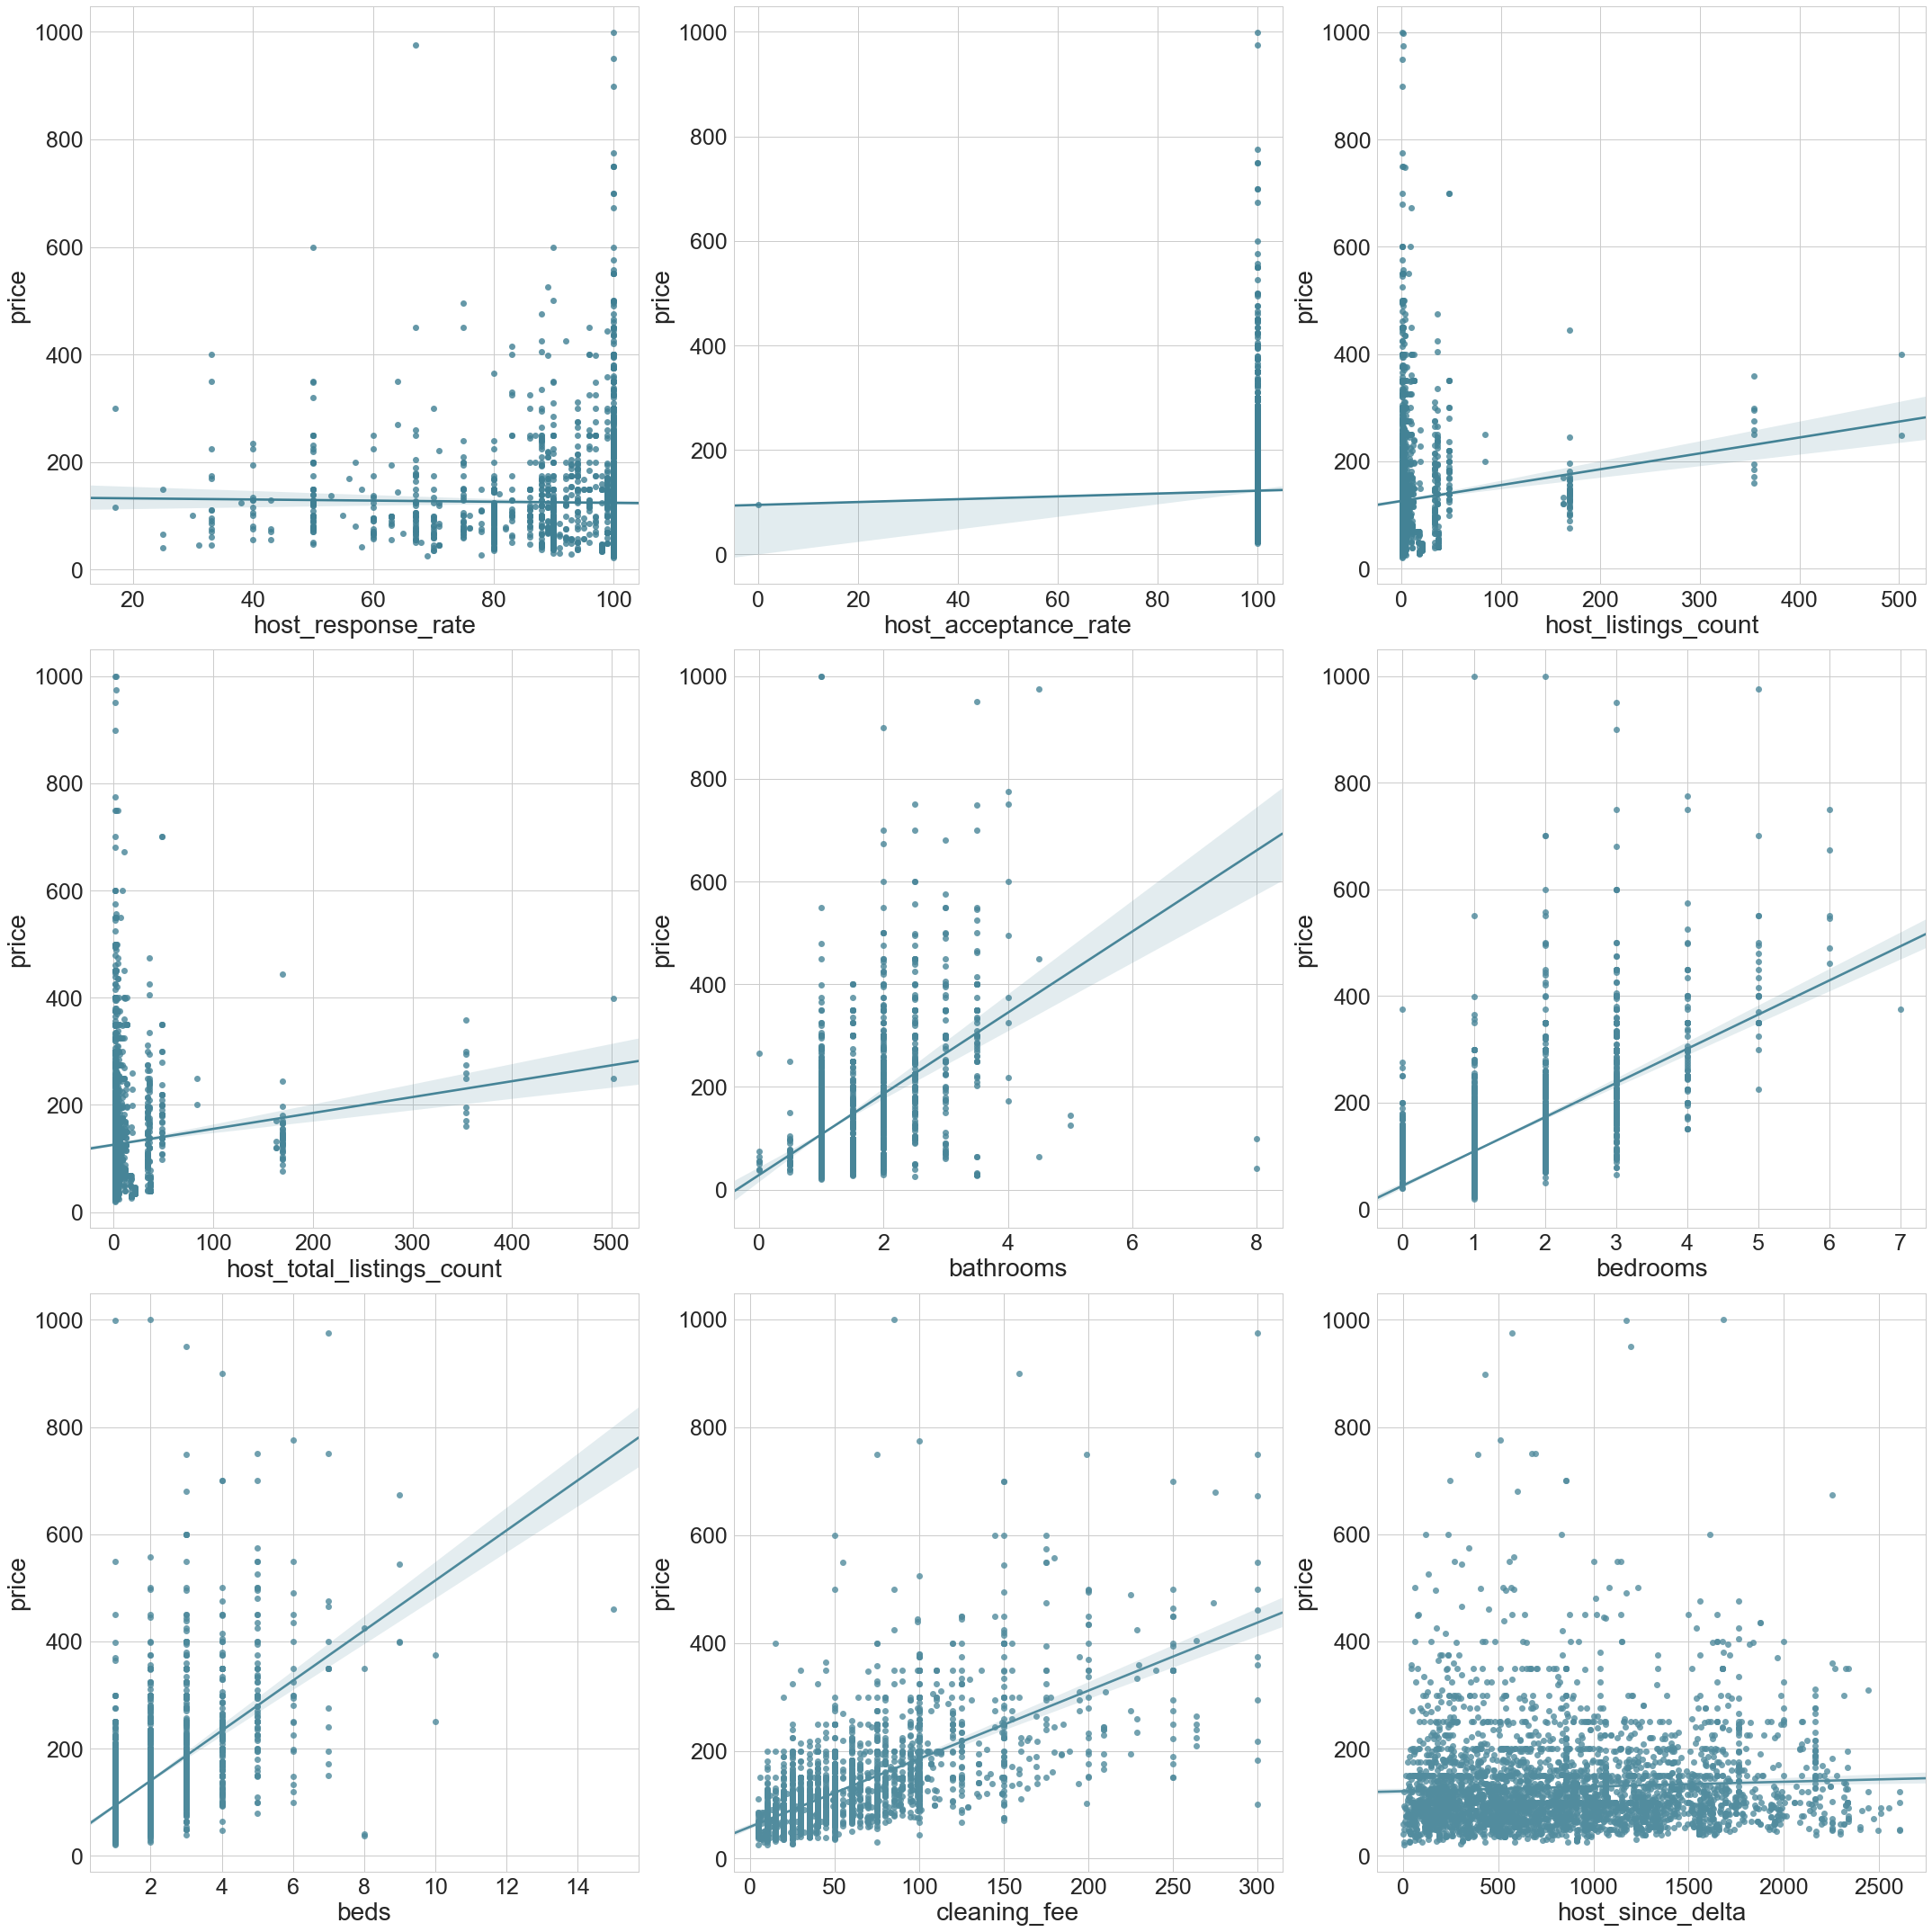

In [29]:
# Plot scatter plot for the rest columns who have missing values.
cols_w_nan = df_selected_cols.columns[df_selected_cols.isnull().any()].tolist()

plot_scatter_in_sub_plot(df_selected_cols[cols_w_nan], df_selected_cols['price'], n_cols = 3)

In [30]:
# Looks like these features are either linear or random to price
# Fix them w/ mean values
for col in cols_w_nan:
    df_selected_cols[col] = df_selected_cols[col].fillna(df_selected_cols[col].mean())

In [31]:
# Make sure all missing values are fixed except reviews
df_selected_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 37 columns):
host_response_time                  3818 non-null int64
host_response_rate                  3818 non-null float64
host_acceptance_rate                3818 non-null float64
host_listings_count                 3818 non-null float64
host_total_listings_count           3818 non-null float64
host_has_profile_pic                3818 non-null bool
host_identity_verified              3818 non-null bool
neighbourhood_cleansed              3818 non-null int64
neighbourhood_group_cleansed        3818 non-null int64
zipcode                             3818 non-null int64
is_location_exact                   3818 non-null bool
property_type                       3818 non-null int64
room_type                           3818 non-null int64
accommodates                        3818 non-null int64
bathrooms                           3818 non-null float64
bedrooms                            3818 non-n

## Fix Outliers

Inspect by describe first.

In [32]:
# Use describe to check if there's any outlier
df_selected_cols.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,calendar_updated,number_of_reviews,cancellation_policy,calculated_host_listings_count,cleaning_fee,price,latitude_longitude_bin,host_since_delta
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,2.982975,94.886798,99.967159,7.157757,7.157757,37.548455,7.482190,9.733106,4.927187,0.365113,3.349398,1.259469,1.307712,1.735394,3.910424,1.672603,10.667627,2.369303,20.882137,22.223415,1.069932,2.946307,61.710904,127.976166,3.648245,837.273585
std,1.112236,11.023789,1.618332,28.620648,28.620648,26.511927,4.791631,6.999140,4.623123,0.541453,1.977599,0.589130,0.882700,1.139330,0.475043,1.311040,17.585922,16.305902,8.657561,37.730892,0.817084,5.893029,41.725079,90.250022,1.248588,569.645825
min,0.000000,17.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,20.000000,0.000000,1.000000
25%,2.000000,94.886798,100.000000,1.000000,1.000000,12.000000,3.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.000000,14.000000,2.000000,0.000000,1.000000,35.000000,75.000000,4.000000,355.000000
50%,3.000000,100.000000,100.000000,1.000000,1.000000,37.000000,6.000000,9.000000,9.000000,0.000000,3.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,2.000000,19.000000,9.000000,1.000000,1.000000,61.710904,100.000000,4.000000,753.000000
75%,4.000000,100.000000,100.000000,3.000000,3.000000,58.000000,11.000000,15.000000,9.000000,1.000000,4.000000,1.000000,2.000000,2.000000,4.000000,2.000000,20.000000,2.000000,31.000000,26.000000,2.000000,2.000000,65.000000,150.000000,4.000000,1235.000000
max,4.000000,100.000000,100.000000,502.000000,502.000000,86.000000,16.000000,28.000000,16.000000,2.000000,16.000000,8.000000,7.000000,15.000000,4.000000,15.000000,300.000000,1000.000000,33.000000,474.000000,2.000000,37.000000,300.000000,1000.000000,7.000000,2611.000000


In [33]:
# minimum_nights 1.0e+08 seems unreasonable
minimum_nights_995_percent = df_selected_cols['minimum_nights'].quantile(0.995)

In [34]:
# Cap minimum_nights to be the 99.5 percentile number of data
df_selected_cols['minimum_nights'] = df_selected_cols['minimum_nights'].map(lambda x: min(x, minimum_nights_995_percent))

In [35]:
# Call describe again & make sure everything else is fine.
df_selected_cols.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,calendar_updated,number_of_reviews,cancellation_policy,calculated_host_listings_count,cleaning_fee,price,latitude_longitude_bin,host_since_delta
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,2.982975,94.886798,99.967159,7.157757,7.157757,37.548455,7.482190,9.733106,4.927187,0.365113,3.349398,1.259469,1.307712,1.735394,3.910424,1.672603,10.667627,2.087742,20.882137,22.223415,1.069932,2.946307,61.710904,127.976166,3.648245,837.273585
std,1.112236,11.023789,1.618332,28.620648,28.620648,26.511927,4.791631,6.999140,4.623123,0.541453,1.977599,0.589130,0.882700,1.139330,0.475043,1.311040,17.585922,2.006122,8.657561,37.730892,0.817084,5.893029,41.725079,90.250022,1.248588,569.645825
min,0.000000,17.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,20.000000,0.000000,1.000000
25%,2.000000,94.886798,100.000000,1.000000,1.000000,12.000000,3.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.000000,14.000000,2.000000,0.000000,1.000000,35.000000,75.000000,4.000000,355.000000
50%,3.000000,100.000000,100.000000,1.000000,1.000000,37.000000,6.000000,9.000000,9.000000,0.000000,3.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,2.000000,19.000000,9.000000,1.000000,1.000000,61.710904,100.000000,4.000000,753.000000
75%,4.000000,100.000000,100.000000,3.000000,3.000000,58.000000,11.000000,15.000000,9.000000,1.000000,4.000000,1.000000,2.000000,2.000000,4.000000,2.000000,20.000000,2.000000,31.000000,26.000000,2.000000,2.000000,65.000000,150.000000,4.000000,1235.000000
max,4.000000,100.000000,100.000000,502.000000,502.000000,86.000000,16.000000,28.000000,16.000000,2.000000,16.000000,8.000000,7.000000,15.000000,4.000000,15.000000,300.000000,20.000000,33.000000,474.000000,2.000000,37.000000,300.000000,1000.000000,7.000000,2611.000000


Plot for each columns and check if there are outliers.

In [36]:
len(df_selected_cols.columns)

37

In [37]:
# define functions for plotting box and dist plots together
def plot_box_and_dist_plot(df_col, axes):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.15, .85)})
    sns.boxplot(df_col, ax = ax_box)
    sns.distplot(df_col, ax = ax_hist)
    ax_box.set(xlabel='')
    plt.show()

In [38]:
# define function for plotting boxplot plot in each subplot
def plot_boxplot_in_sub_plot(df_x, n_cols = 3, label_font_size = 28, tick_font_size = 25):
    n_total_cols = len(df_x.columns)
    fig, axes = get_sub_plots(n_total_cols, n_cols)
    
    for i, col in enumerate(df_x):
        sns.boxplot(df_x[col], orient = 'v', ax = axes[i])
        axes[i].tick_params(labelsize = tick_font_size)
        axes[i].set_xlabel(axes[i].get_ylabel(), fontsize = label_font_size)
        axes[i].set_ylabel('values', fontsize = label_font_size)
                
    fig.tight_layout()    
    plt.show()

In [39]:
# Plot box plot for columns except boolean data and category data.
# Update columns_categorical first
for col in cols_categorical:
    if col not in df_selected_cols.columns:
        cols_categorical.remove(col)

cols = df_selected_cols.select_dtypes(exclude=[bool]).columns.values.tolist()
for col in cols:
    if col in cols_categorical:
        cols.remove(col)

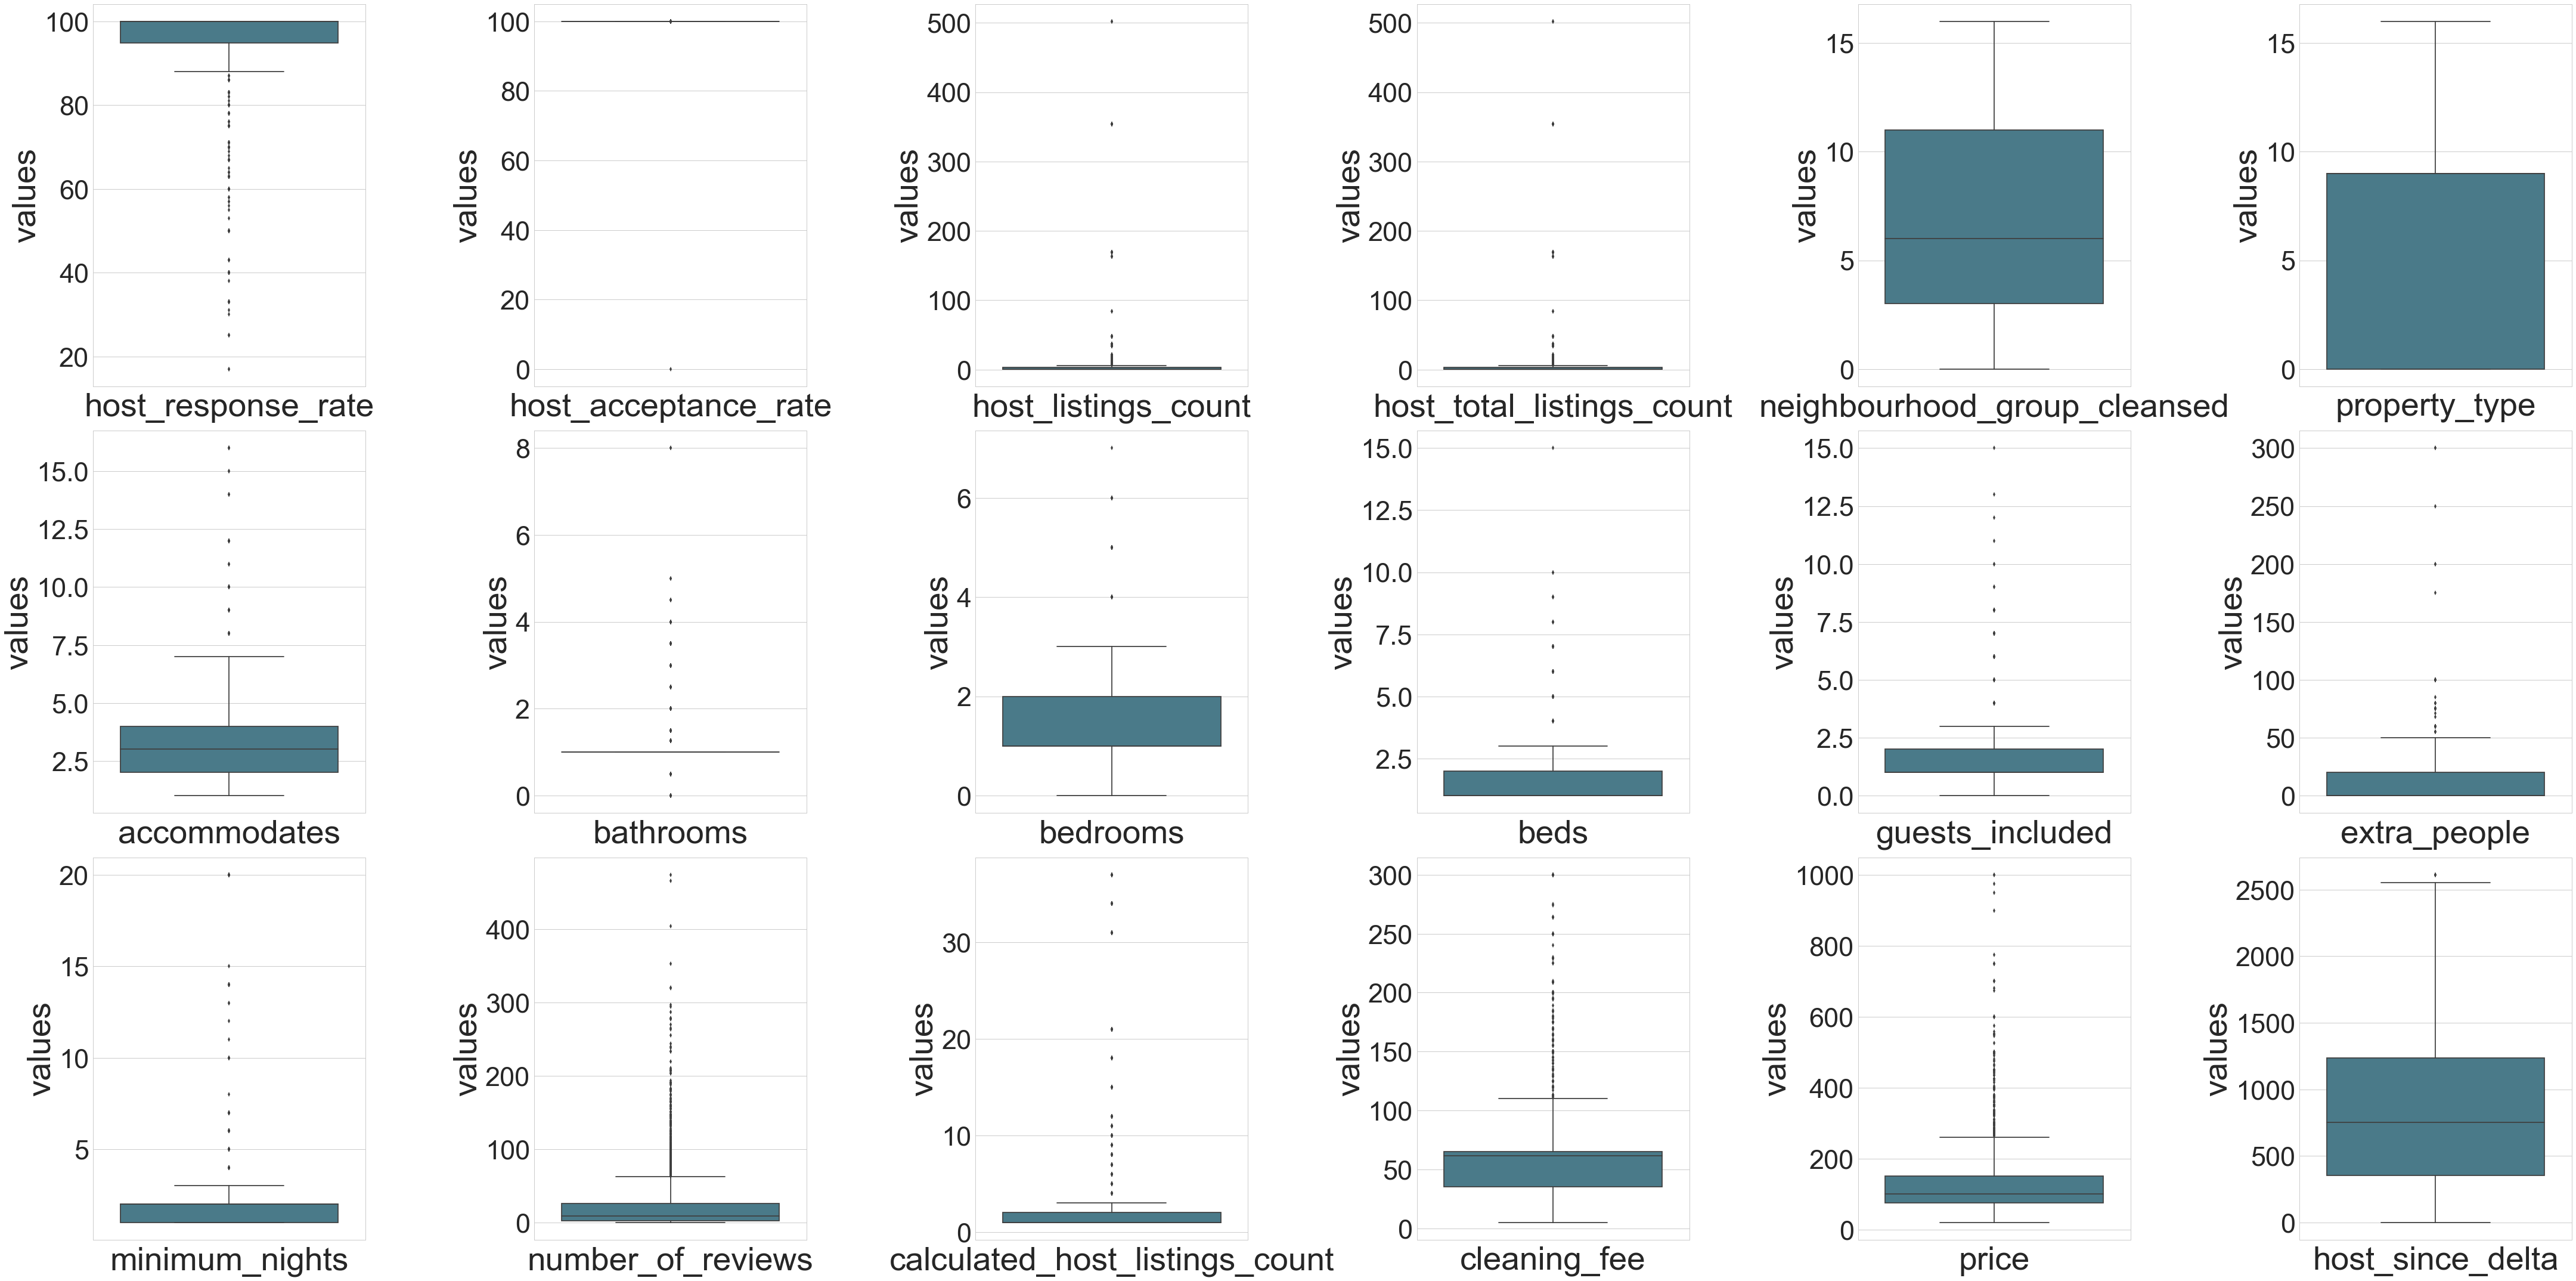

In [40]:
plot_boxplot_in_sub_plot(df_selected_cols[cols], n_cols = 6, label_font_size = 55, tick_font_size = 45)

In [41]:
# define function for plotting countplot in each subplot
def plot_countplot_in_sub_plot(df, n_cols = 5, label_font_size = 28, tick_font_size = 25):
    n_total_cols = len(df.columns)
    fig, axes = get_sub_plots(n_total_cols, n_cols)
        
    for i, col in enumerate(df):
        sns.countplot(x = col, data = df, ax = axes[i])
        axes[i].tick_params(labelsize = tick_font_size)
        axes[i].set_xlabel(axes[i].get_xlabel(), fontsize = label_font_size)
        axes[i].set_ylabel(axes[i].get_ylabel(), fontsize = label_font_size)
            
    fig.tight_layout()    
    plt.show()

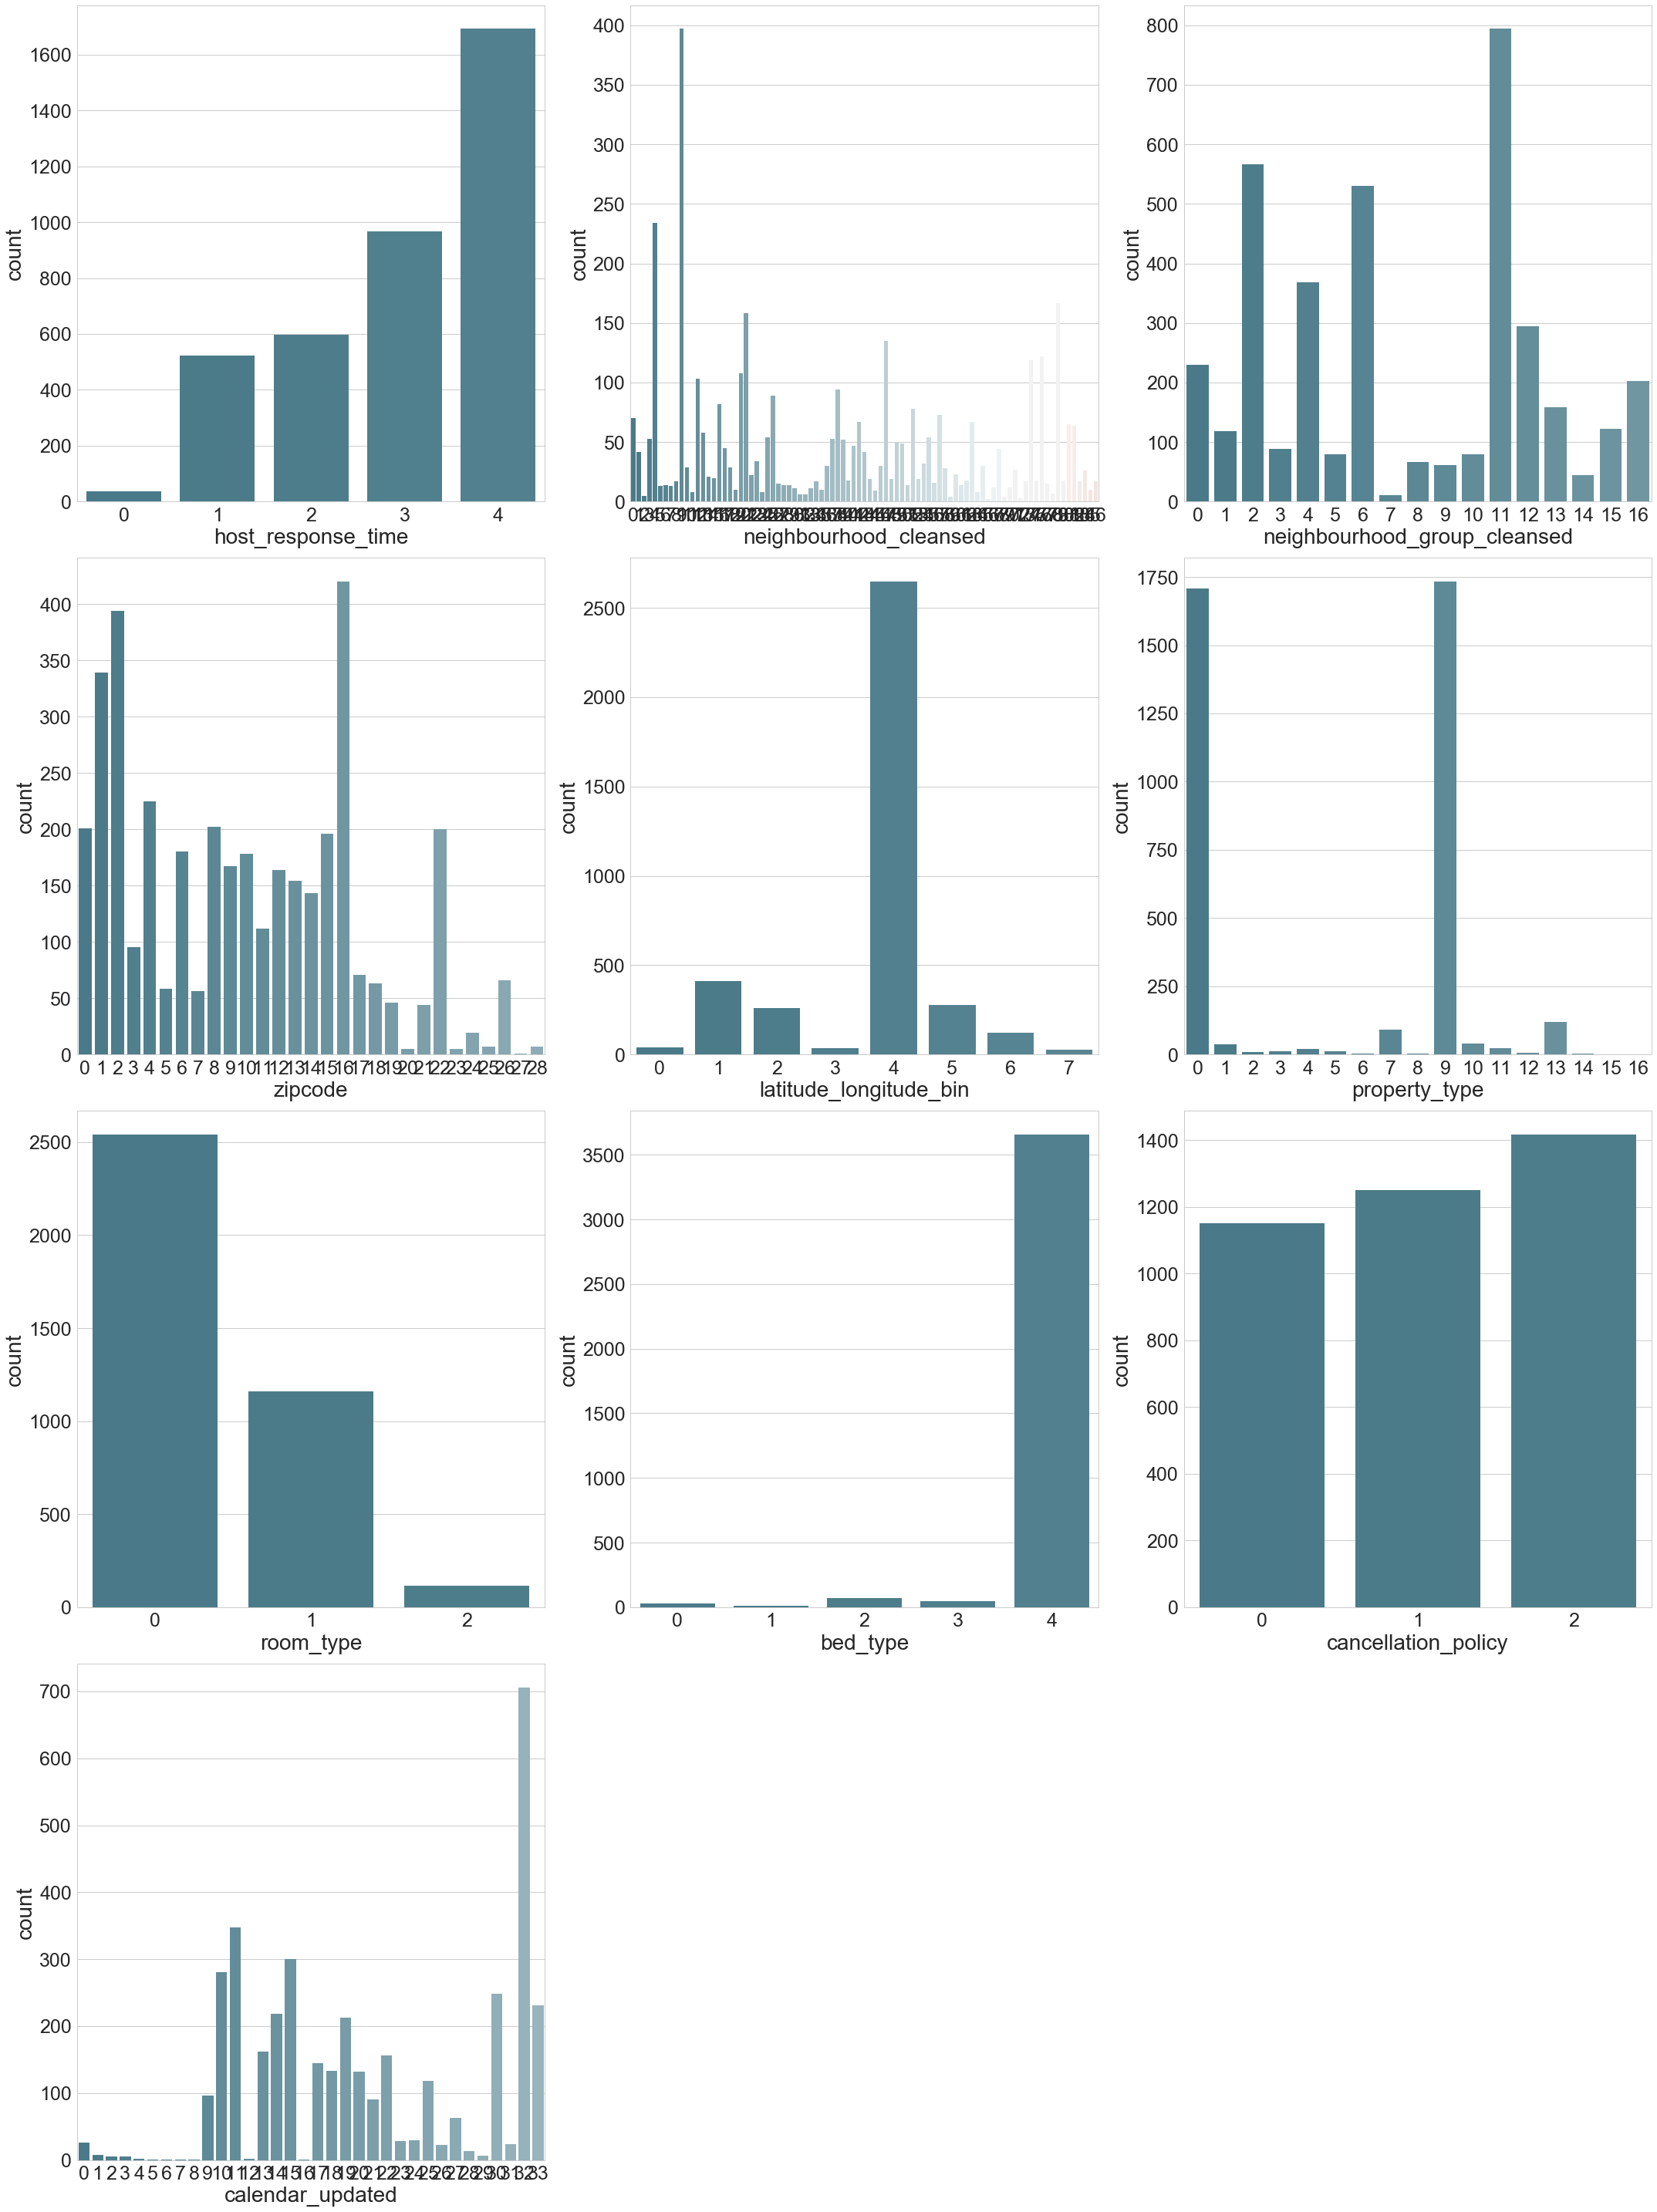

In [42]:
# Plot bar chart for category data
plot_countplot_in_sub_plot(df_selected_cols[cols_categorical], n_cols = 3)

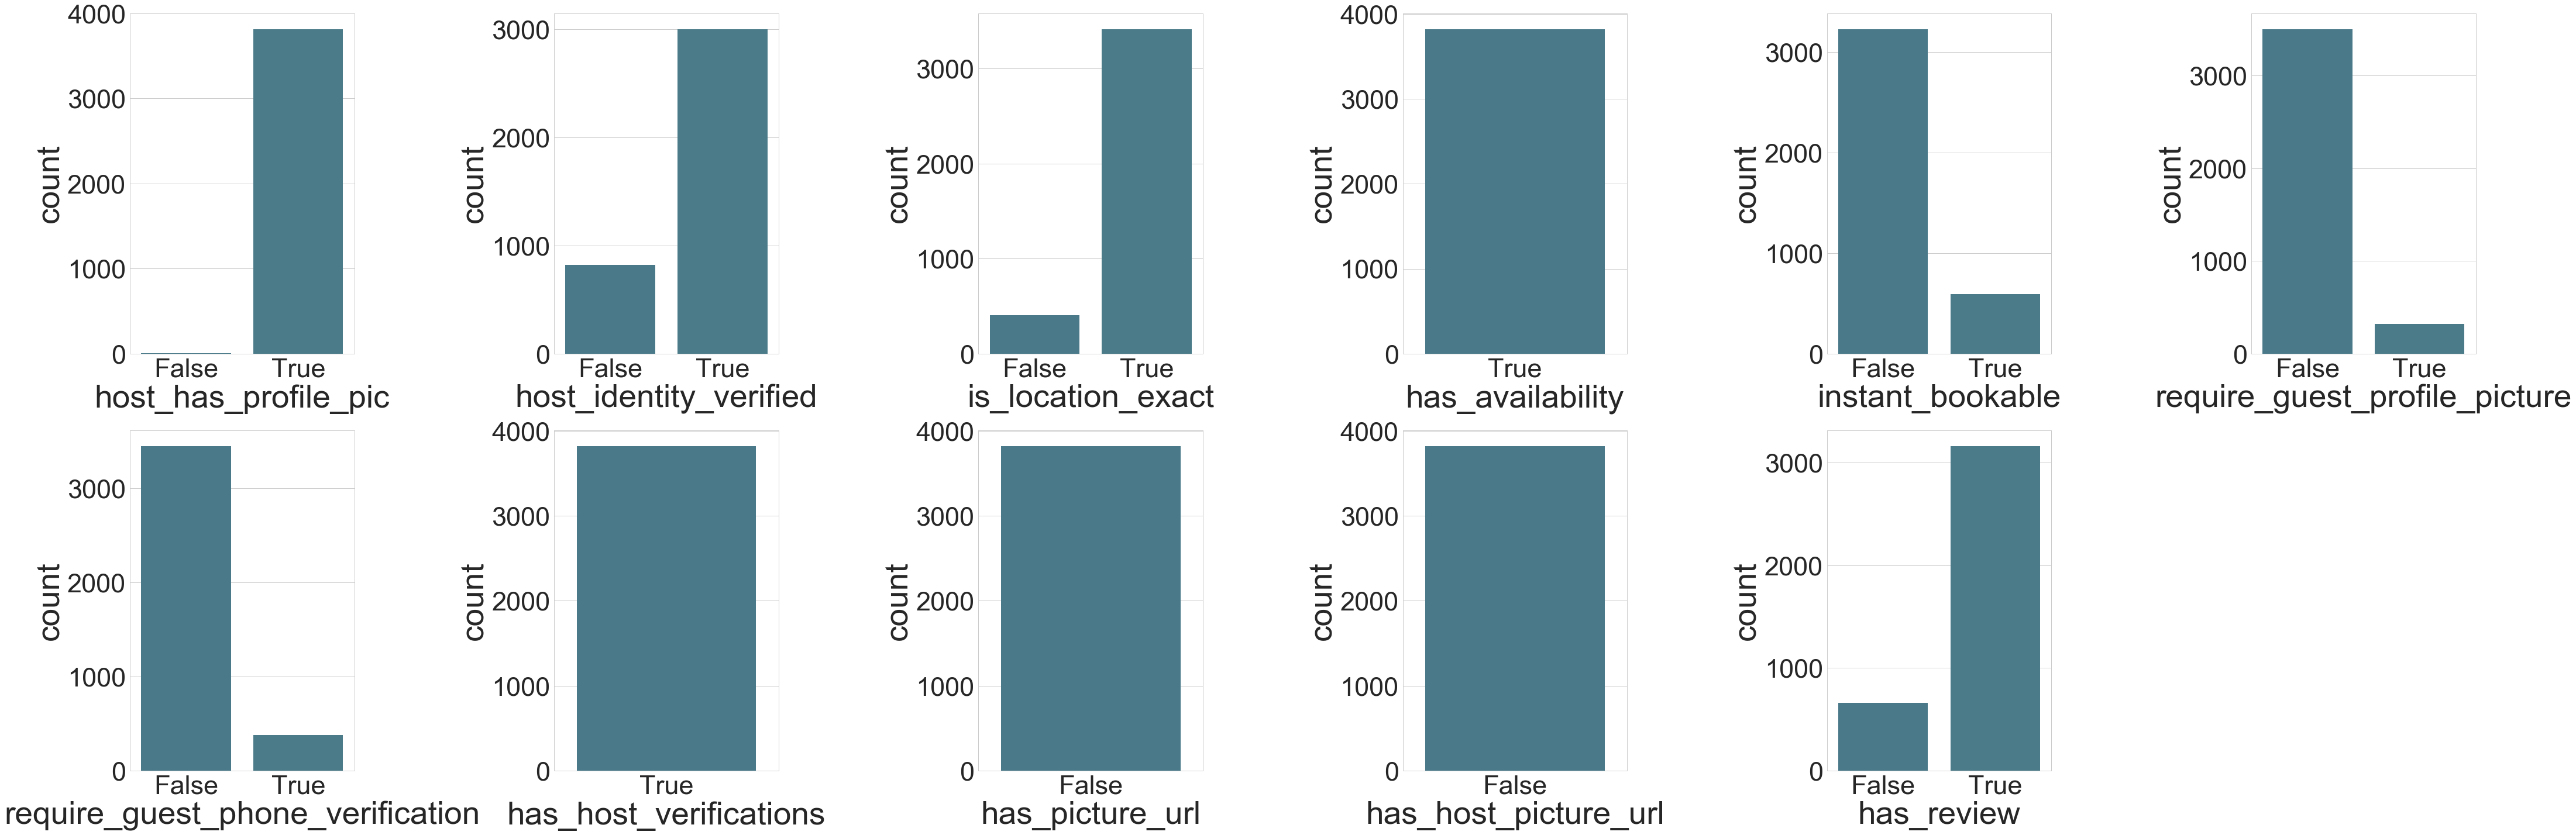

In [43]:
# Plot bar chart for boolean data
plot_countplot_in_sub_plot(df_selected_cols.select_dtypes(include=[bool]), n_cols = 6,
                           label_font_size = 55, tick_font_size = 45)

## Drop more columns
Drop more columns as we have too many # columns as compared to # data points.

In [44]:
# Inspect current columns
print(len(df_selected_cols.columns))
print(df_selected_cols.columns)

37
Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'guests_included',
       'extra_people', 'minimum_nights', 'calendar_updated',
       'has_availability', 'number_of_reviews', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'cleaning_fee', 'price', 'latitude_longitude_bin', 'host_since_delta',
       'has_host_verifications', 'has_picture_url', 'has_host_picture_url',
       'has_review'],
      dtype='object')


In [45]:
# Drop some columns as we already have some plots and they do not seem needed
df_selected_cols = df_selected_cols.drop(['host_response_rate', 'host_acceptance_rate',
                                          'host_listings_count', 'host_total_listings_count',
                                          'host_since_delta', 'has_availability',
                                          'has_host_verifications', 'has_picture_url',
                                          'has_host_picture_url', 'has_review'], axis=1)

In [46]:
print(len(df_selected_cols.columns))
print(df_selected_cols.columns)

27
Index(['host_response_time', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'guests_included',
       'extra_people', 'minimum_nights', 'calendar_updated',
       'number_of_reviews', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'cleaning_fee', 'price',
       'latitude_longitude_bin'],
      dtype='object')


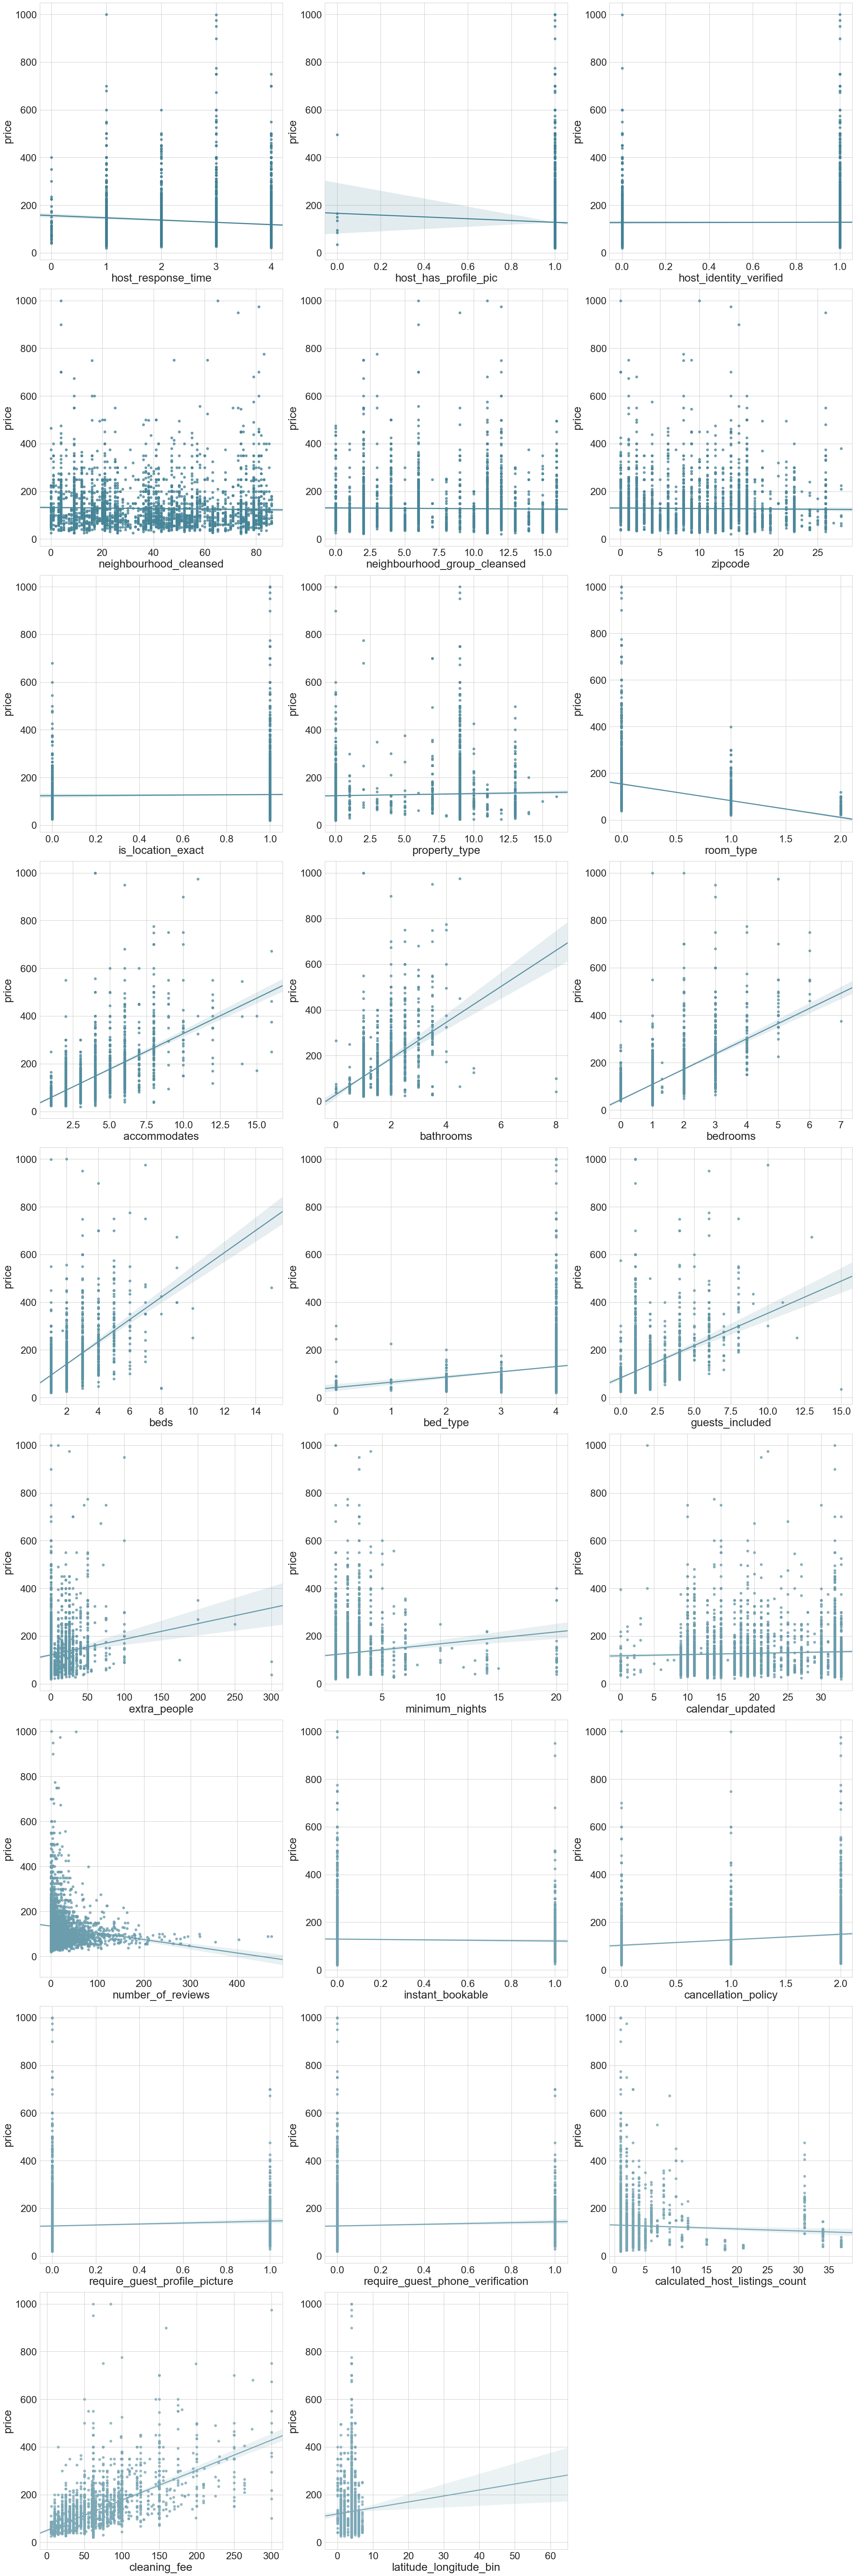

In [47]:
# Plot scatter plot of columns vs. price again to drop unnecessary columns
cols_wo_price = df_selected_cols.columns.values.tolist()
cols_wo_price.remove('price')

plot_scatter_in_sub_plot(df_selected_cols[cols_wo_price], df_selected_cols['price'], n_cols = 3)

In [48]:
# Drop more columns
dropped_cols = ['host_response_time', 'host_has_profile_pic', 'host_identity_verified',
                'neighbourhood_cleansed', 'is_location_exact',
                'extra_people', 'minimum_nights', 'calendar_updated',
                'number_of_reviews', 'instant_bookable',
                'require_guest_profile_picture',
                'require_guest_phone_verification', 'calculated_host_listings_count']

df_selected_cols = df_selected_cols.drop(dropped_cols, axis=1)

In [49]:
# Make sure that we have reasonable number of columns
df_selected_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 14 columns):
neighbourhood_group_cleansed    3818 non-null int64
zipcode                         3818 non-null int64
property_type                   3818 non-null int64
room_type                       3818 non-null int64
accommodates                    3818 non-null int64
bathrooms                       3818 non-null float64
bedrooms                        3818 non-null float64
beds                            3818 non-null float64
bed_type                        3818 non-null int64
guests_included                 3818 non-null int64
cancellation_policy             3818 non-null int64
cleaning_fee                    3818 non-null float64
price                           3818 non-null float64
latitude_longitude_bin          3818 non-null int64
dtypes: float64(5), int64(9)
memory usage: 607.4 KB


In [50]:
df_selected_cols.describe()

,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,7.482190,9.733106,4.927187,0.365113,3.349398,1.259469,1.307712,1.735394,3.910424,1.672603,1.069932,61.710904,127.976166,3.648245
std,4.791631,6.999140,4.623123,0.541453,1.977599,0.589130,0.882700,1.139330,0.475043,1.311040,0.817084,41.725079,90.250022,1.248588
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,20.000000,0.000000
25%,3.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,35.000000,75.000000,4.000000
50%,6.000000,9.000000,9.000000,0.000000,3.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,61.710904,100.000000,4.000000
75%,11.000000,15.000000,9.000000,1.000000,4.000000,1.000000,2.000000,2.000000,4.000000,2.000000,2.000000,65.000000,150.000000,4.000000
max,16.000000,28.000000,16.000000,2.000000,16.000000,8.000000,7.000000,15.000000,4.000000,15.000000,2.000000,300.000000,1000.000000,7.000000


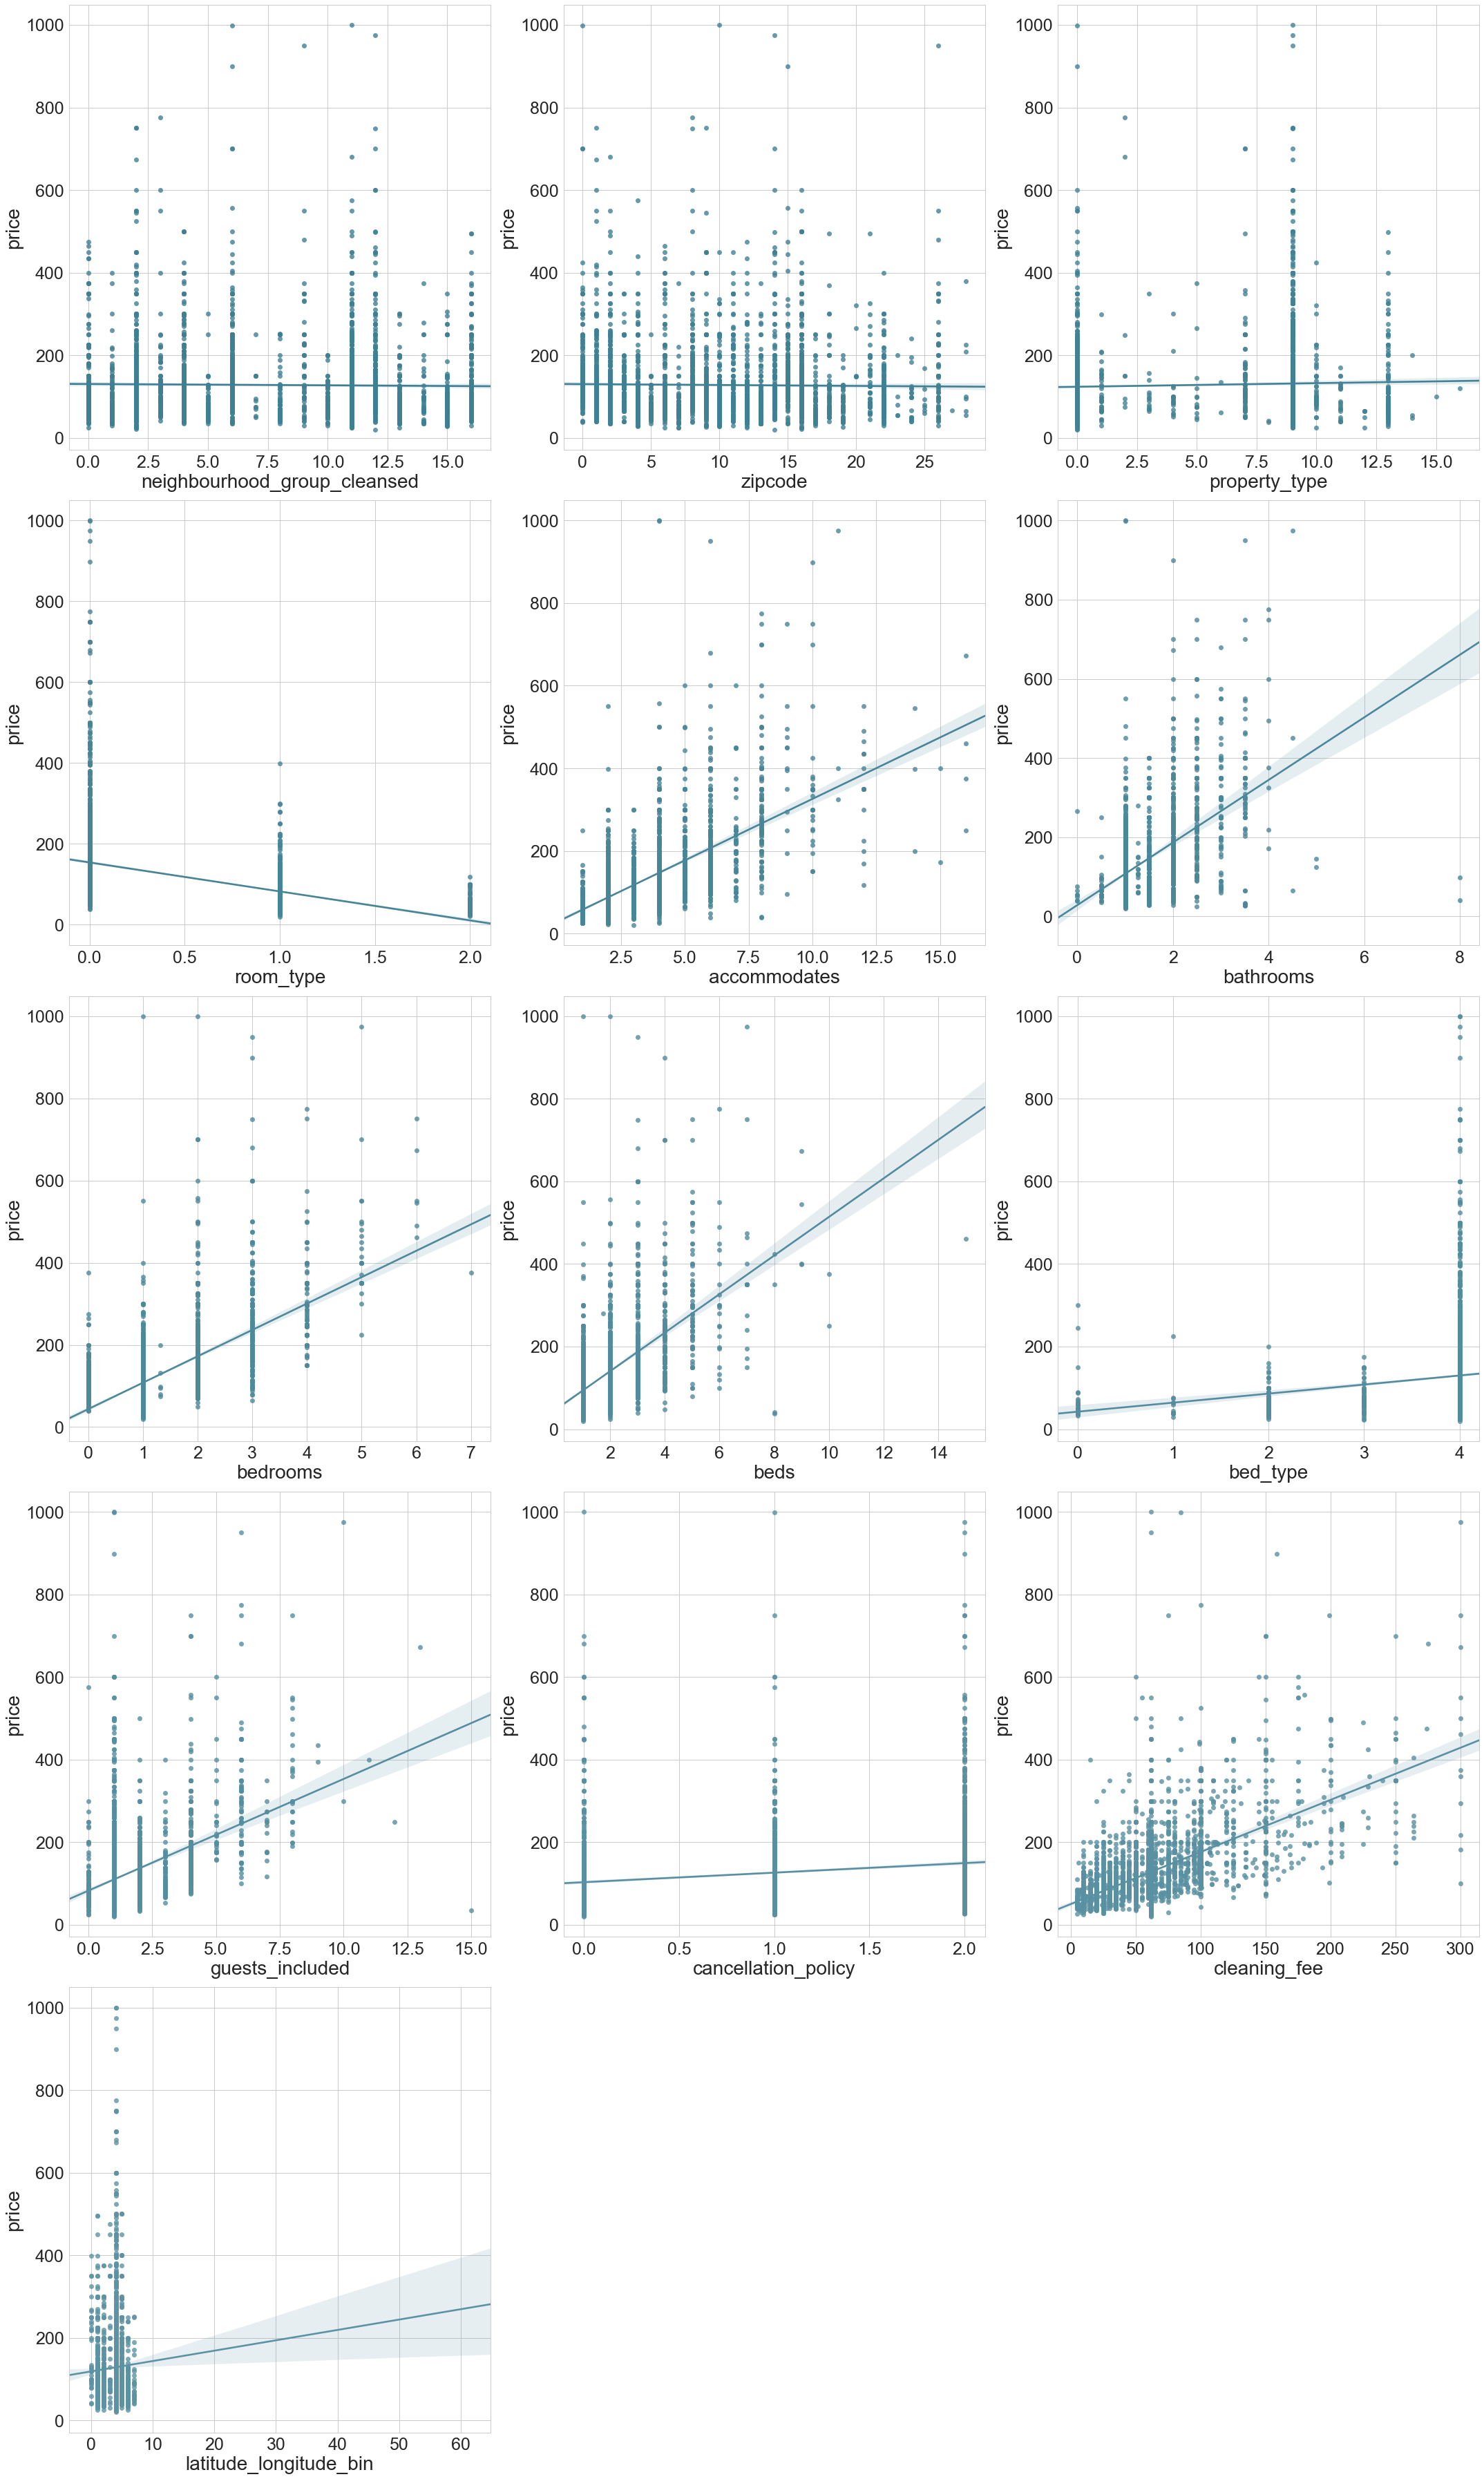

In [51]:
cols_wo_price = df_selected_cols.columns.values.tolist()
cols_wo_price.remove('price')

plot_scatter_in_sub_plot(df_selected_cols[cols_wo_price], df_selected_cols['price'])